# PyBer Analysis
---

## Preamble
---

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import numpy as np

In [2]:
# Files to load

ride_data_to_load = pd.read_csv("resources/ride_data.csv") 
city_data_to_load = pd.read_csv("resources/city_data.csv")

In [3]:
ride_data_df = pd.DataFrame(ride_data_to_load)
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


## Quality Control Checks
---

In [4]:
# Quality control checks
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [5]:
# Quality control checks
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [6]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [7]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [8]:
city_data_df = pd.DataFrame(city_data_to_load)
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [9]:
# Quality control checks
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [10]:
# Quality control checks
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [11]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [12]:
# Get unique values for city data
city_data_df["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

## DataFrame Generation
---

In [13]:
# Merge ride and city data frames
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [14]:
# Creates dataframes that filters on urban cities
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [15]:
# Check proper filtering
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# Check proper filtering
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [17]:
# Check proper filtering
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [18]:
# Rural Ride Count
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

# Urban Ride Count
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

# Suburban Ride Count
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

In [19]:
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [20]:
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [21]:
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [22]:
# Rural Fare
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

# Urban Fare
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

# Suburban Fare
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

In [23]:
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [24]:
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [25]:
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [26]:
# Rural driver count
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

# Urban driver count
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

# Suburban driver count
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

In [27]:
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [28]:
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [29]:
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

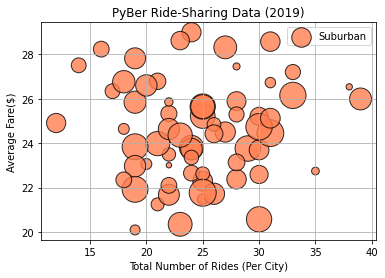

In [30]:
# Urban scatter plot
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count,
            label="Suburban",
            color="coral",
           edgecolor="black",
            linewidths=1,
           alpha=0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend
plt.legend()

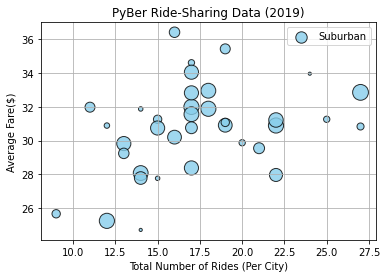

In [31]:
#Suburban scatter plot
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count,
            label="Suburban",
            color="skyblue",
           edgecolor="black",
            linewidths=1,
           alpha=0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend
plt.legend()

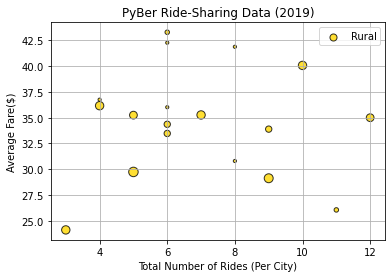

In [32]:
# Rural scatter plot
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count,
            label="Rural",
            color="gold",
           edgecolor="black",
            linewidths=1,
           alpha=0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend
plt.legend()

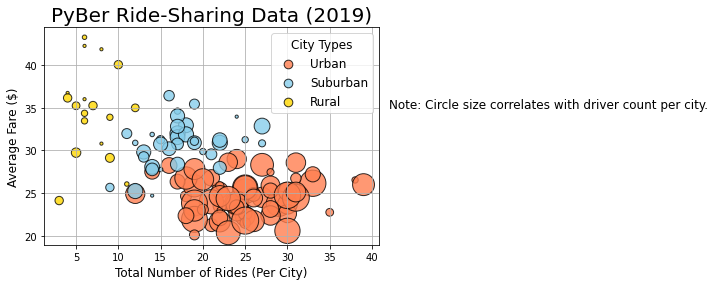

In [33]:
# All scatter plots
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count,
            label="Urban",
            color="coral",
           edgecolor="black",
            linewidths=1,
           alpha=0.8)

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count,
            label="Suburban",
            color="skyblue",
           edgecolor="black",
            linewidths=1,
           alpha=0.8)

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count,
            label="Rural",
            color="gold",
           edgecolor="black",
            linewidths=1,
           alpha=0.8)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize="20")
plt.xlabel("Total Number of Rides (Per City)", fontsize="12")
plt.ylabel("Average Fare ($)", fontsize="12")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", 
                  scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42,35, "Note: Circle size correlates with driver count per city.", fontsize=12)

# Save the figure
plt.savefig("analysis/Fig1.png")

plt.show()
plt.close()

In [34]:
# Get summary statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [35]:
# Get summary statistics
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [36]:
# Get summary statistics
rural_ride_count.describe()


count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [37]:
# Calculate the mean of the ride count for each type of city
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [38]:
# Calculate the median of the ride count for each type of city
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [39]:
# Calculate the mode
urban_ride_count.mode()

0    22
1    25
Name: ride_id, dtype: int64

In [40]:
# Calculate the mode
suburban_ride_count.mode()

0    17
Name: ride_id, dtype: int64

In [41]:
# Import NumPy and stats module from SciPy
import numpy as np
import scipy.stats as sts

In [42]:
# Calculate measures of central tendency 
mean_urban_ride_count = np.mean(urban_ride_count)
median_urban_ride_count = np.median(urban_ride_count)
mode_urban_ride_count = sts.mode(urban_ride_count)

print(f'The mean for the ride counts for urban trips is ${mean_urban_ride_count:.2f}')
print(f'The median for the ride counts for urban trips is ${median_urban_ride_count:.2f}')
print(f'The mode for the ride counts for urban trips is {mode_urban_ride_count}')

The mean for the ride counts for urban trips is $24.62
The median for the ride counts for urban trips is $24.00
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7]))


In [43]:
# Calculate measures of central tendency 
mode_rural_ride_count = sts.mode(rural_ride_count)
mode_rural_ride_count

ModeResult(mode=array([6]), count=array([5]))

## Fare Prices

In [44]:
# Create fare variables for each city type
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

In [45]:
# Urban fare
mean_urban_fares = np.mean(urban_fares)
median_urban_fares = np.median(urban_fares)
mode_urban_fares = sts.mode(urban_fares)

print(f'The mean for the ride counts for urban trips is ${mean_urban_fares:.2f}')
print(f'The median for the ride counts for urban trips is ${median_urban_fares:.2f}')
print(f'The mode for the ride counts for urban trips is {mode_urban_fares}\n')

# Suburban fare
mean_suburban_fares = np.mean(suburban_fares)
median_suburban_fares = np.median(suburban_fares)
mode_suburban_fares = sts.mode(suburban_fares)

print(f'The mean for the ride counts for suburban trips is ${mean_suburban_fares:.2f}')
print(f'The median for the ride counts for suburban trips is ${median_suburban_fares:.2f}')
print(f'The mode for the ride counts for suburban trips is {mode_suburban_fares}\n')

# Rural fare
mean_rural_fares = np.mean(rural_fares)
median_rural_fares = np.median(rural_fares)
mode_rural_fares = sts.mode(rural_fares)

print(f'The mean for the ride counts for rural trips is ${mean_rural_fares:.2f}')
print(f'The median for the ride counts for rural trips is ${median_rural_fares:.2f}')
print(f'The mode for the ride counts for rural trips is {mode_rural_fares}')

The mean for the ride counts for urban trips is $24.53
The median for the ride counts for urban trips is $24.64
The mode for the ride counts for urban trips is ModeResult(mode=array([22.86]), count=array([5]))

The mean for the ride counts for suburban trips is $30.97
The median for the ride counts for suburban trips is $30.75
The mode for the ride counts for suburban trips is ModeResult(mode=array([17.99]), count=array([3]))

The mean for the ride counts for rural trips is $34.62
The median for the ride counts for rural trips is $37.05
The mode for the ride counts for rural trips is ModeResult(mode=array([37.05]), count=array([2]))


## Summary Statistics for # Drivers by City Type (5.4.3)

In [46]:
# Get the driver count data from the urban cities
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

In [47]:
# Central tendency for urban cities using np and scipy
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)

In [48]:
print(f'The mean for urban drivers is {mean_urban_drivers}')
print(f'The median for urban drivers is {median_urban_drivers}')
print(f'The mode for urban drivers is {mode_urban_drivers}')

The mean for urban drivers is 36.67815384615385
The median for urban drivers is 37.0
The mode for urban drivers is ModeResult(mode=array([39]), count=array([86]))


In [49]:
# Centrail tendency with describe
urban_drivers.describe()

count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [50]:
# Centrail tendency with describe
suburban_drivers.describe()

count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [51]:
# Centrail tendency with describe
rural_drivers.describe()

count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

### Box and Whisker Plots for Ride Count

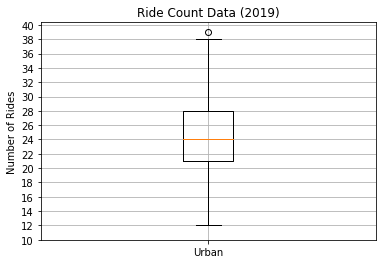

In [52]:
# Create a box and whisker plot for the urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis, and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

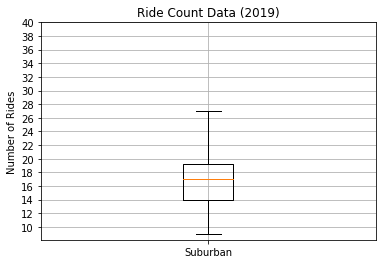

In [53]:
# Create a box and whisker plot for the suburban cities ride count
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add the title, y-axis, and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

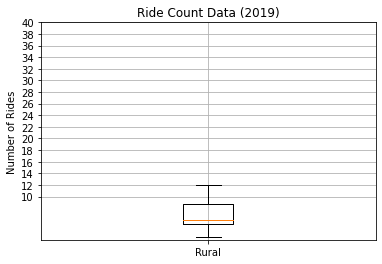

In [54]:
# Create a box and whisker plot for the rural cities ride count
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# Add the title, y-axis, and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

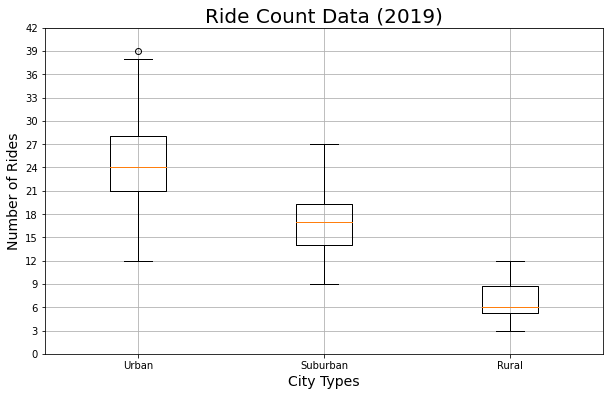

In [55]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [56]:
# Get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f'{urban_city_outlier} has the highest rider count.')

West Angela has the highest rider count.


### Box and Whisker Plots for Ride Fare

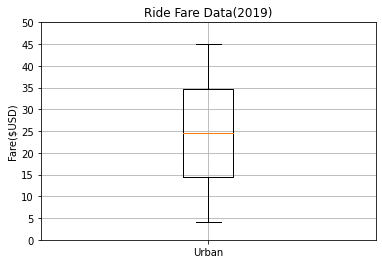

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [57]:
# Create plot for urban fare data
x_labels = ["Urban"]
fig, ax = plt.subplots()

ax.boxplot(urban_fares, labels=x_labels)

ax.set_title("Ride Fare Data(2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

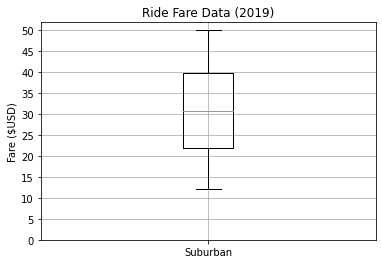

In [58]:
# Create plot for suburban fare data
x_labels = ["Suburban"]
fig, ax = plt.subplots()

ax.boxplot(suburban_fares, labels=x_labels)

ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
print("Summary Statistics")
suburban_fares.describe()

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

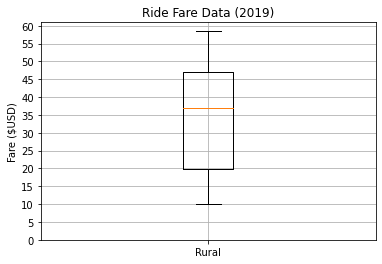

In [59]:
# Create plot for rural fare data
x_labels = ["Rural"]
fig, ax = plt.subplots()

ax.boxplot(rural_fares, labels=x_labels)

ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,65, step=5.0))
ax.grid()
print("Summary Statistics")
suburban_fares.describe()

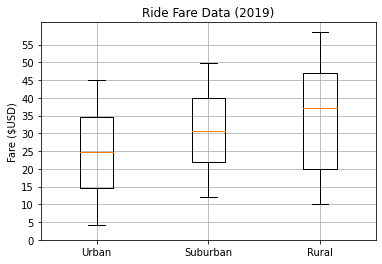

In [60]:
# Create combined plot for fare data
fare_data = [urban_fares, suburban_fares, rural_fares]
x_labels = ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots()

ax.boxplot(fare_data, labels=x_labels)

ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
plt.savefig("analysis/Fig3.png")


## Box and Whisker for Driver Count Data

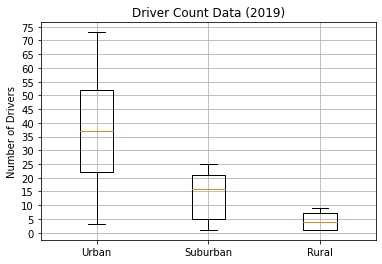

In [61]:
# Create combined plot for driver count data
fare_data = [urban_drivers, suburban_drivers, rural_drivers]
x_labels = ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots()

ax.boxplot(fare_data, labels=x_labels)

ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
plt.savefig("analysis/Fig4.png")

## Get Percentage of Fares for Each City Type (5.5.1)

In [62]:
# Get the sum of fares for each city type

sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [63]:
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [64]:
# Calculate the percentage of fares for each city type
type_percents = sum_fares_by_type / total_fares * 100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

### Create a Pie Chart of the Data

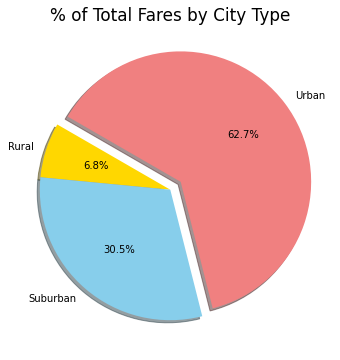

In [65]:
import matplotlib as mpl

# Create pie chart
plt.subplots(figsize=(10,6))
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "skyblue", "lightcoral"],
        explode=[0,0,0.1],
        shadow=True, startangle=150,
        autopct="%1.1f%%"
       )
#Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14
plt.title("% of Total Fares by City Type")
plt.savefig("analysis/Fig5.png")

plt.show()
plt.close()